## Problem Statement
- Identify countries that are direst need of aid
- categorize countries based on socio-economic and health factors that determine the overall development of the country
- suggest the countries that needs more attention.

### Approach used
- K means
- Hierarchical Clustering

In [1]:
#---------- importing required librarires for initial analysis ---------- 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

#---------- display options ---------- 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.display.float_format='{:.4f}'.format

sns.set_style("whitegrid")

plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20

#---------- filtering warnings ---------- 

import warnings
warnings.filterwarnings("ignore")

### Reading and understanding data

In [2]:
#reading the country-data.csv file to the dataframe name 'cntry'

cntry = pd.read_csv("Country-data.csv", encoding = 'utf-8')

In [3]:
#setting seed to get the same cluster

np.random.seed(0)

In [4]:
#viewing first few rows

cntry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [5]:
#checking the dataframe info

cntry.info() 

#no null values found in any columns
#country is of type 'object' and all other columns are numerical / continous

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
#checking datfarame shape

cntry.shape 

#167 rows and 10 columns

(167, 10)

In [7]:
#checking statistical information of numerical columns

cntry.describe() 

#at a glance, outliers could be seen in child_mort, exports, imports, income, inflation and gdpp. There is a a huge difference
#between max value and 75th percentile value


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


### Data Cleaning

In [8]:
#checking is there are any missing values in the dataframe

cntry.isnull().sum()

#this confirms that there are no missing values in any of the columns.

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Data handling

In [9]:
#changing 'exports', 'health' and 'imports' from percentage of GDP to GDP values. 
#this is done to make the dataset more reliable for analysis
#for that each column to be multiplied by total GDP, i.e. 'gdpp' column and divide the result by 100

#changing 'export' column
cntry.exports = (cntry.exports*cntry.gdpp)/100

#changing 'health' column
cntry.health = (cntry.health*cntry.gdpp)/100

#changing 'imports' column
cntry.imports = (cntry.imports*cntry.gdpp)/100

In [10]:
#chcking few rows again after data handling

cntry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100,1.4400,76.8000,2.1300,12200


### Performing EDA

In [11]:
#defining a function to run several univariate analysis on each continous columns

def uni_cont(col):
    
    fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(20,6))
    
    sns.boxplot(cntry[col], color = 'teal', ax = ax[0])
    ax[0].set_title("Analysis on "+col, fontsize=14)
    
    sns.distplot(cntry[col], color = 'crimson', ax = ax[1])
    ax[1].set_title("DIstribution of "+col, fontsize=14)
    
    print("Statistical Information of "+col+" column")
    print(cntry[col].describe())
    
    

Statistical Information of child_mort column
count   167.0000
mean     38.2701
std      40.3289
min       2.6000
25%       8.2500
50%      19.3000
75%      62.1000
max     208.0000
Name: child_mort, dtype: float64


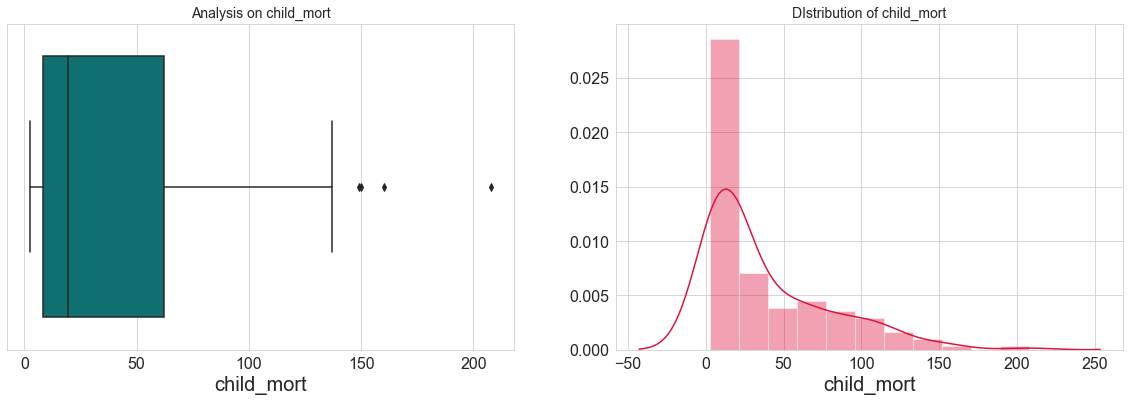

In [12]:
uni_cont('child_mort')

- **`this column indicates 'child mortality'. As it can be seen from the above analysis of this column, there are outliers on the right. These cannot be removed, as the values represent the number of child deaths in each country, and these values are essesntial for analysis.`**

Statistical Information of exports column
count      167.0000
mean      7420.6188
std      17973.8858
min          1.0769
25%        447.1400
50%       1777.4400
75%       7278.0000
max     183750.0000
Name: exports, dtype: float64


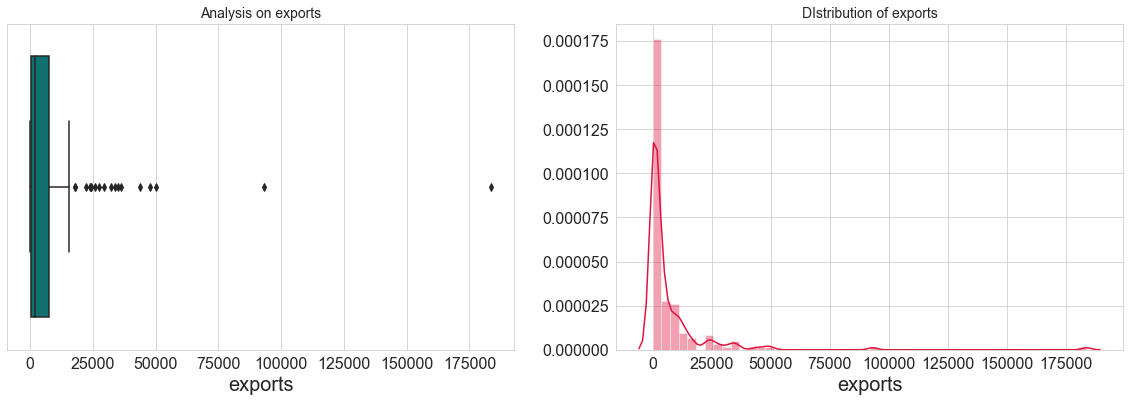

In [13]:
uni_cont('exports')

- **`this column indicates 'exports of goods and services per capita'. As it can be seen from the above analysis of this column, there are outliers on the right. These can be capped and removed; if outliers still exist after the treatment, they can be ignored as the data is limited.`**

Statistical Information of health column
count    167.0000
mean    1056.7332
std     1801.4089
min       12.8212
25%       78.5355
50%      321.8860
75%      976.9400
max     8663.6000
Name: health, dtype: float64


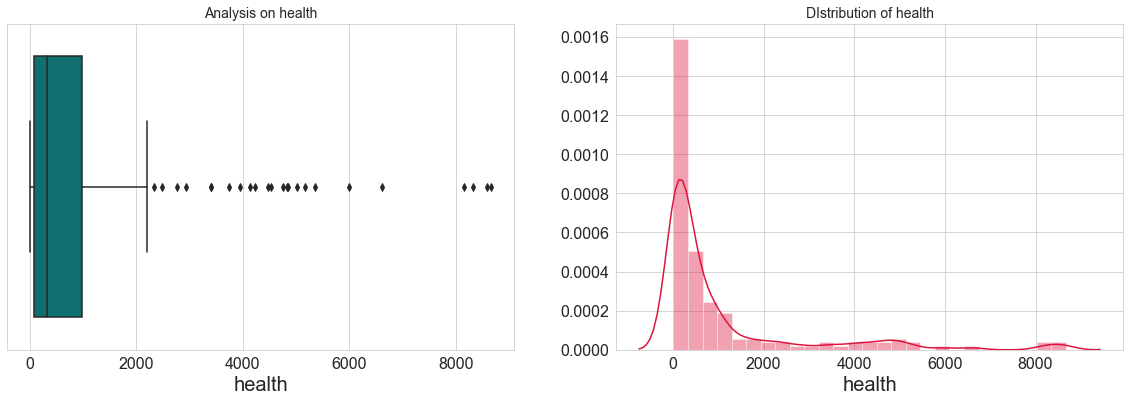

In [14]:
uni_cont('health')

- **`this column indicates 'health spending per capita'. As it can be seen from the above analysis of this column, there are outliers on the right. These can be capped and removed; if outliers still exist after the treatment, they can be ignored as the data is limited.`**

Statistical Information of imports column
count      167.0000
mean      6588.3521
std      14710.8104
min          0.6511
25%        640.2150
50%       2045.5800
75%       7719.6000
max     149100.0000
Name: imports, dtype: float64


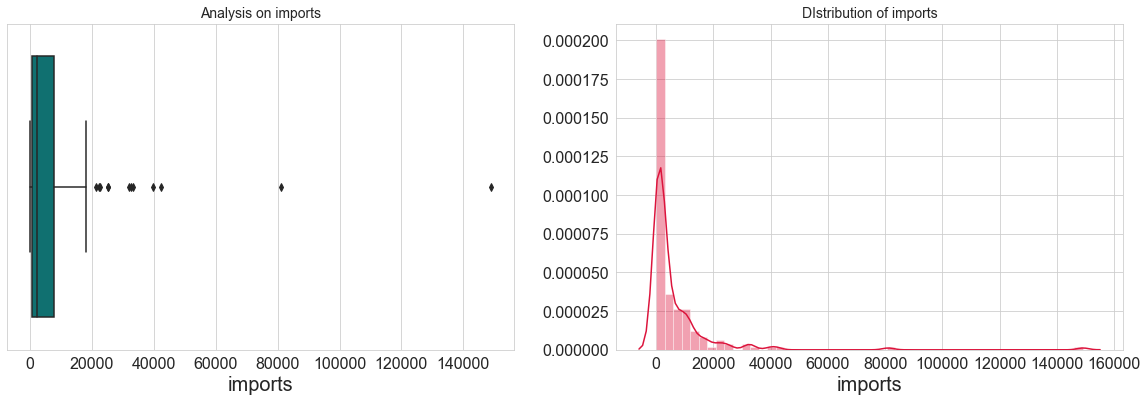

In [15]:
uni_cont('imports')

- **`this column indicates 'imports of goods and services per capita'. As it can be seen from the above analysis of this column, there are outliers on the right. These can be capped and removed; if outliers still exist after the treatment, they can be ignored as the data is limited.`**

Statistical Information of income column
count      167.0000
mean     17144.6886
std      19278.0677
min        609.0000
25%       3355.0000
50%       9960.0000
75%      22800.0000
max     125000.0000
Name: income, dtype: float64


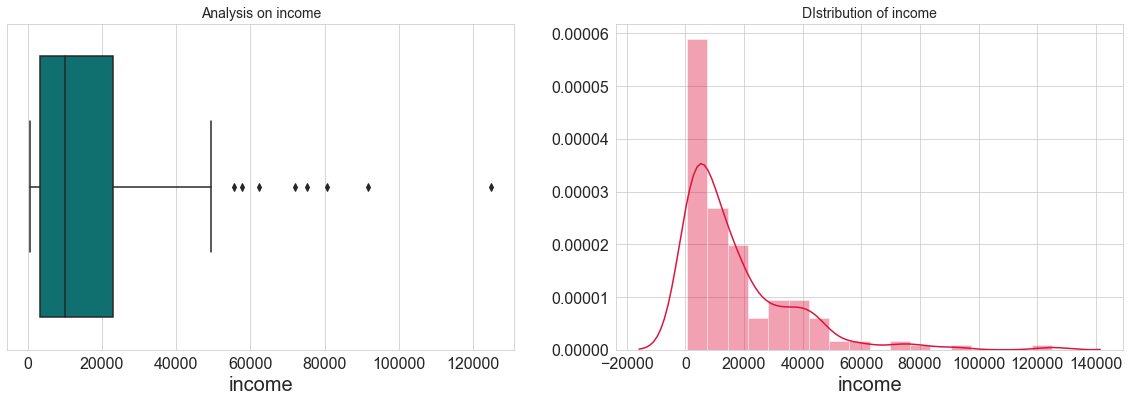

In [16]:
uni_cont("income")

- **`this column indicates 'net income per person'. As it can be seen from the above analysis of this column, there are outliers on the left and right. Left outliers cannot be removed as they represent countries with lower income; and it has to be checked further; hence they are not treated. On the otherhand, right outliers can be capped and removed; if outliers still exist after the treatment, they can be ignored as the data is limited.`**

Statistical Information of inflation column
count   167.0000
mean      7.7818
std      10.5707
min      -4.2100
25%       1.8100
50%       5.3900
75%      10.7500
max     104.0000
Name: inflation, dtype: float64


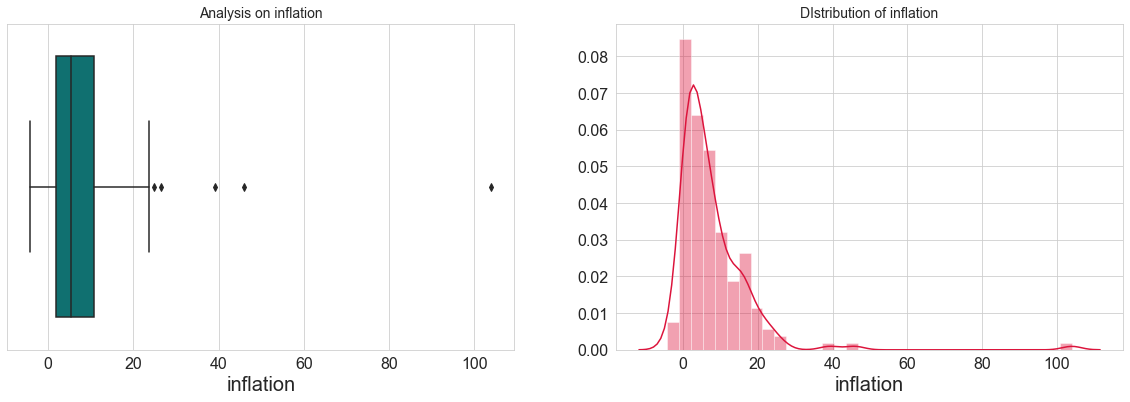

In [17]:
uni_cont('inflation')

- **`this column indicates 'measurement of annual growth rate'. As it can be seen from the above analysis of this column, there are outliers on the right. These cannot be removed, as the values represent countires that need aid; and removing them results in loss of data.`**

Statistical Information of life_expec column
count   167.0000
mean     70.5557
std       8.8932
min      32.1000
25%      65.3000
50%      73.1000
75%      76.8000
max      82.8000
Name: life_expec, dtype: float64


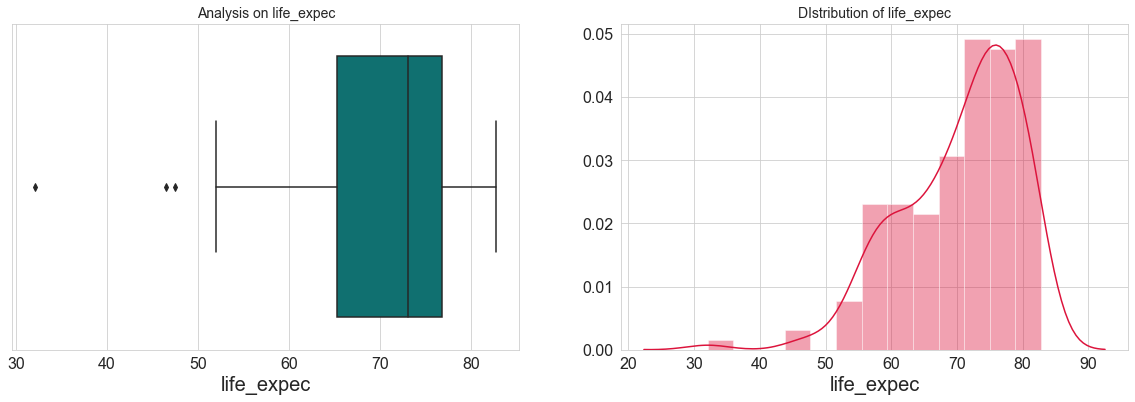

In [18]:
uni_cont('life_expec')

- **`this column indicates 'average number of yeras a newborn child would live'. As it can be seen from the above analysis of this column, there are outliers on the left. These cannot be removed, as the values represent the measure of life expectancy in each country, and these values are essesntial for analysis.`**

Statistical Information of total_fer column
count   167.0000
mean      2.9480
std       1.5138
min       1.1500
25%       1.7950
50%       2.4100
75%       3.8800
max       7.4900
Name: total_fer, dtype: float64


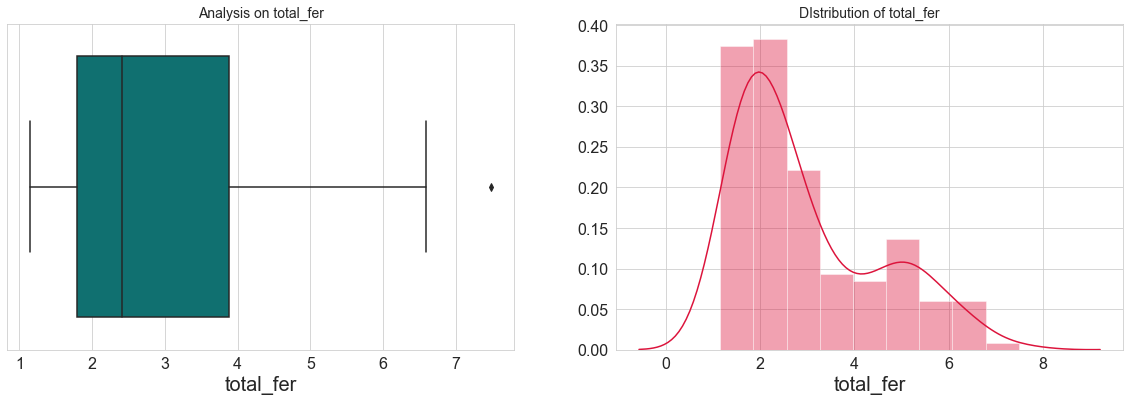

In [19]:
uni_cont('total_fer')

Statistical Information of gdpp column
count      167.0000
mean     12964.1557
std      18328.7048
min        231.0000
25%       1330.0000
50%       4660.0000
75%      14050.0000
max     105000.0000
Name: gdpp, dtype: float64


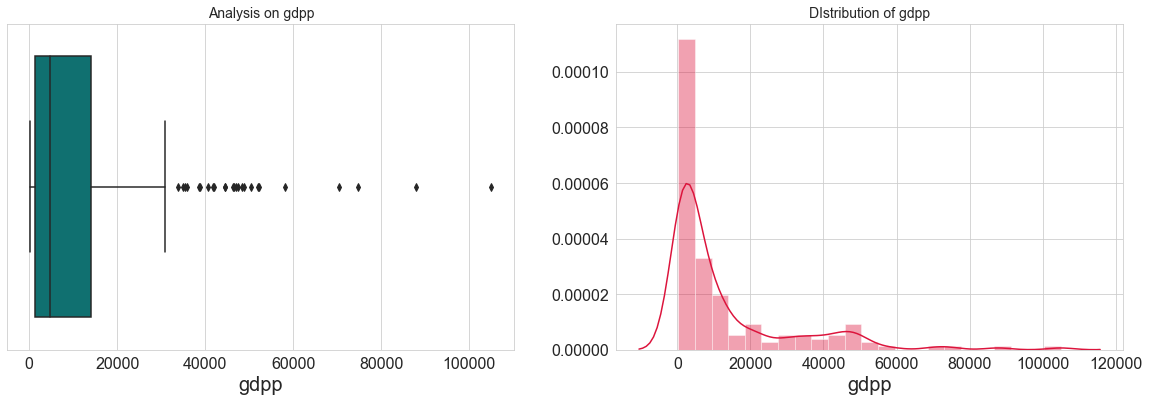

In [20]:
uni_cont('gdpp')

***`from the above analysis, it is clear that all columns possess outliers`***

**`BIVARIATE ANALYSIS`**

In [21]:
#defining a function to run several univariate analysis on each continous columns

def biv_cont(x,y):
    
    fig, ax = plt.subplots(nrows=1, ncols = 2, figsize=(20,6))
    
    sns.scatterplot(x=cntry[x], y=cntry[y], color = 'crimson', ax = ax[0])
    ax[0].set_title("Analysis on "+x+ " vs "+y, fontsize=14)
    
    sns.lineplot(x=cntry[x], y=cntry[y], color = 'teal', ax = ax[1])
    ax[1].set_title("Line Distribution of "+x+ " vs "+y, fontsize=14)
    

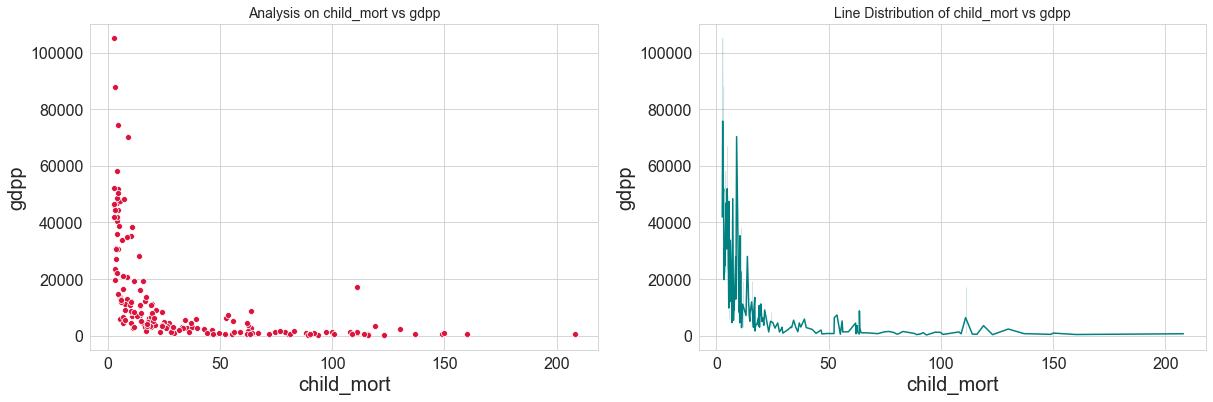

In [22]:
biv_cont('child_mort','gdpp')

#as child_mort increases, gdpp becomes low

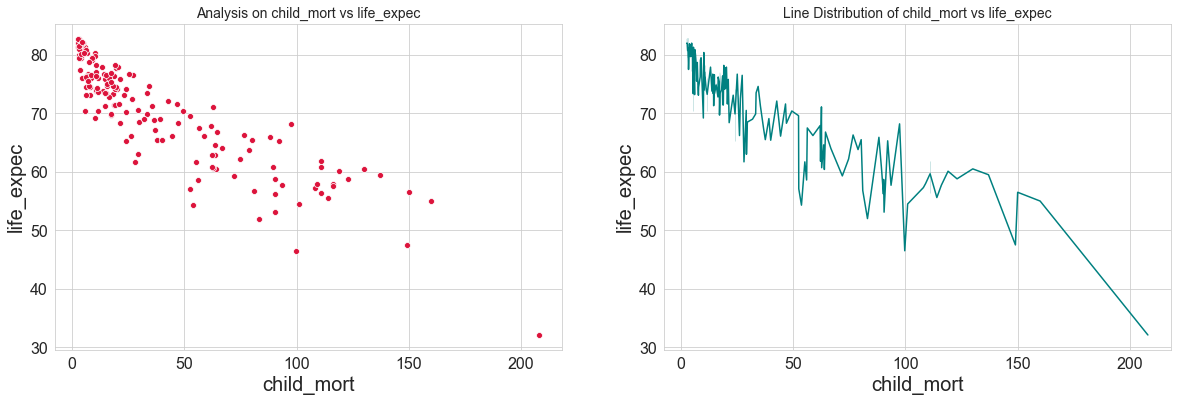

In [23]:
biv_cont('child_mort','life_expec')

#as child_mort increases, life_expec decreases

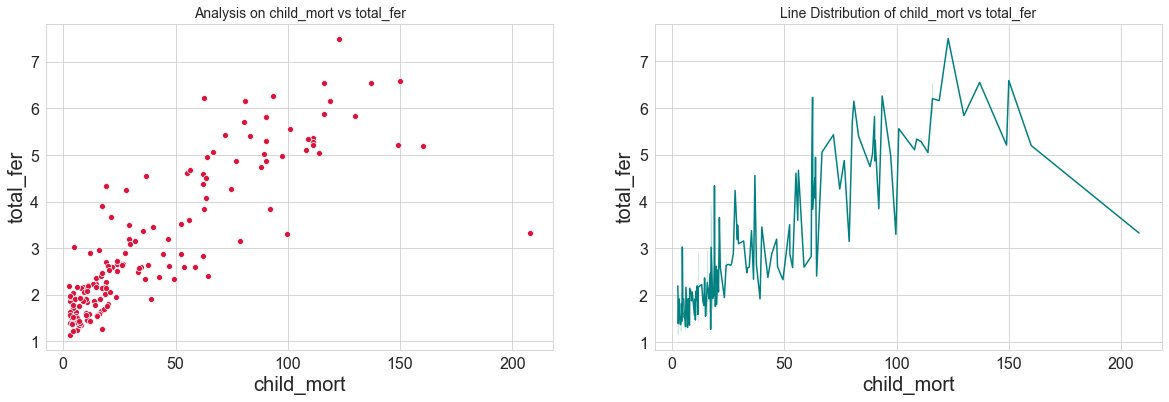

In [24]:
biv_cont('child_mort','total_fer')

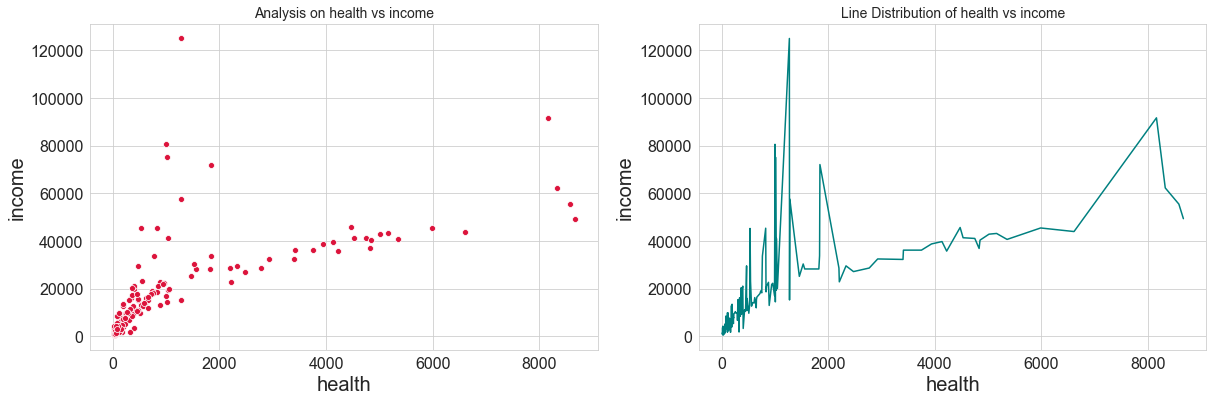

In [25]:
biv_cont('health','income')

#as income increases, health spending also increases

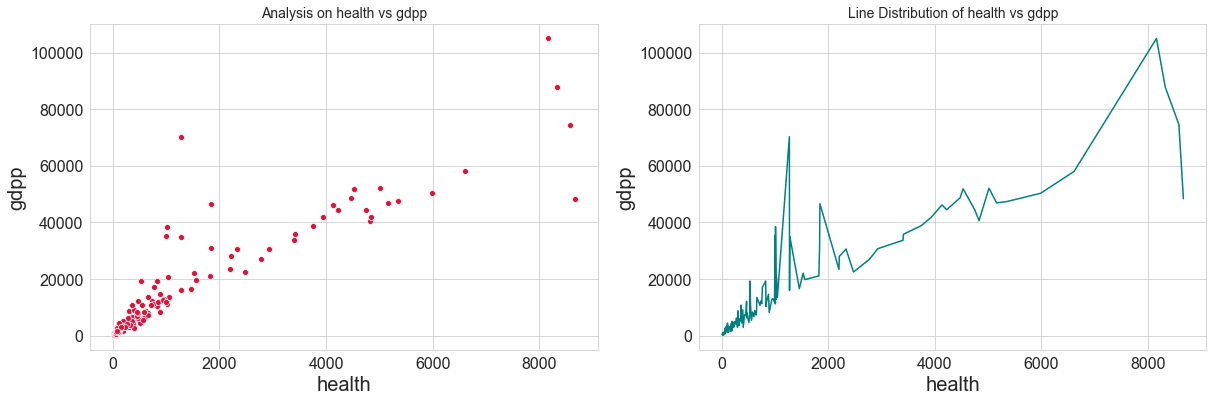

In [26]:
biv_cont('health','gdpp')

#health spending affects gdpp positively

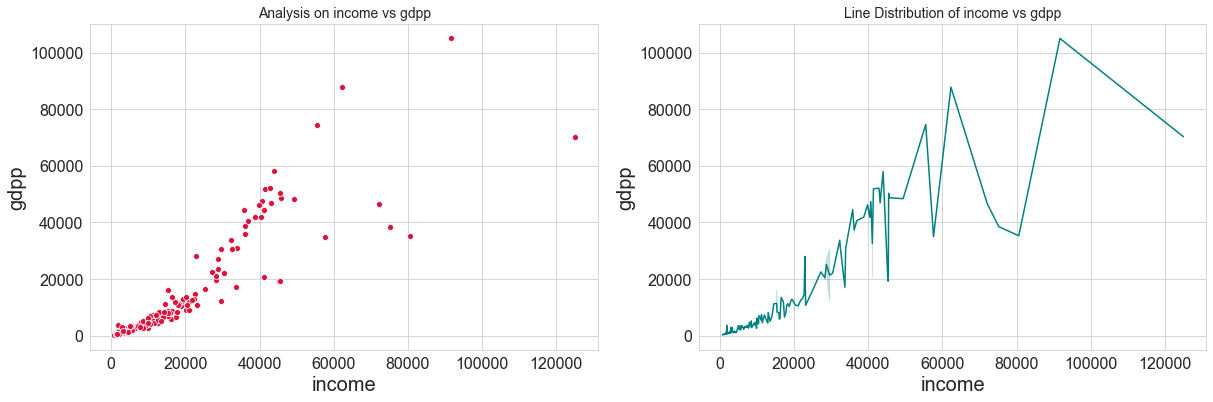

In [27]:
biv_cont('income','gdpp')

#income rate affects gdpp positively

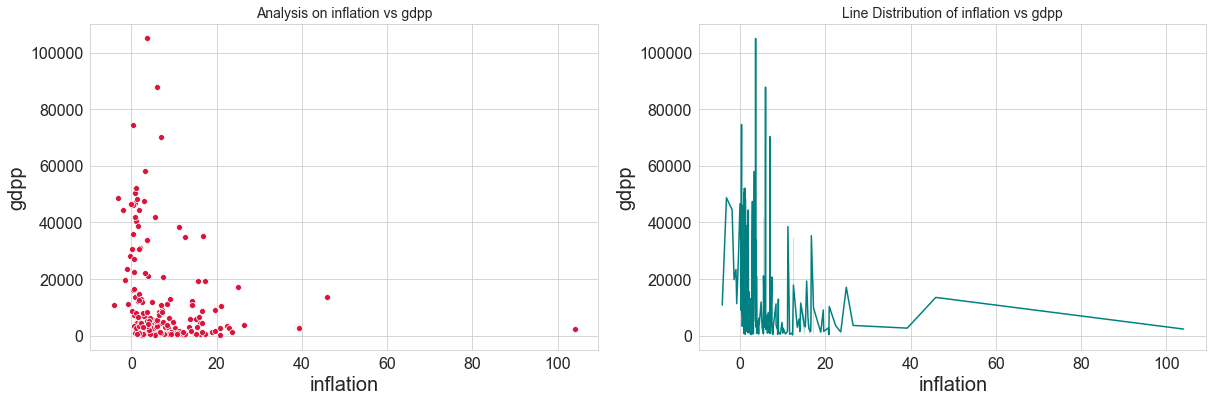

In [28]:
biv_cont('inflation','gdpp')

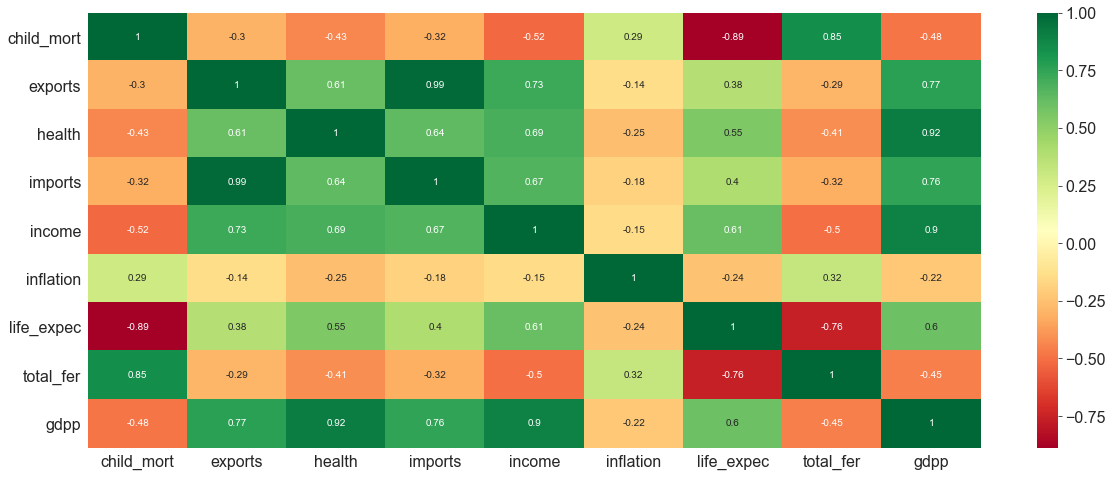

In [29]:
#heatmap

plt.figure(figsize=(20,8))
sns.heatmap(cntry.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

**even though there are features with high correlation, they wont be dropped at this point, as the data points are limited.**

### Outlier treatment

In [30]:
#capping outliers from 'child_mort'. 

#since we need right outliers as it depicts the higher no of child_mort rate, we cap only the lower range.

cQ1 = cntry['child_mort'].quantile(0.01)

cntry['child_mort'][cntry['child_mort'] <= cQ1] = cQ1

In [31]:
#capping outliers from 'exports'

#since we don't need right outliers as it depicts the higher no of export rate, we cap higher range.

eQ3 = cntry['exports'].quantile(0.99)

cntry['exports'][cntry['exports'] >= eQ3] = eQ3

In [32]:
#capping right outliers from 'health'

#since we don't need right outliers as it depicts the higher no of health spending rate, we cap higher range.

hQ3 = cntry['health'].quantile(0.99)

cntry['health'][cntry['health'] >= hQ3] = hQ3

In [33]:
#capping right outliers from 'imports'

#since we don't need right outliers as it depicts the higher no of imports rate, we cap higher range.

impQ3 = cntry['imports'].quantile(0.99)

cntry['imports'][cntry['imports'] >= impQ3] = impQ3

In [34]:
#capping right outliers from 'income'

#since we don't need right outliers as it depicts the higher income rate, we cap higher range.

incQ3 = cntry['income'].quantile(0.99)

cntry['income'][cntry['income'] >= incQ3] = incQ3

In [35]:
#capping outliers from 'inflation'

#since we need right outliers as it depicts the higher inflation rate, we cap only the lower range.

infQ1 = cntry['inflation'].quantile(0.01)

cntry['inflation'][cntry['inflation'] <= infQ1] = infQ1

In [36]:
#capping outliers from 'life_expec'

#since we don't need right outliers as it depicts the higher no of life expectancy rate, we cap higher range.

lQ3 = cntry['life_expec'].quantile(0.99)

cntry['life_expec'][cntry['life_expec'] >= lQ3] = lQ3

In [37]:
#capping outliers from 'total_fer'

#since we need right outliers as it depicts the higher no of total_fer rate, we cap only the lower range.

ferQ1 = cntry['total_fer'].quantile(0.01)

cntry['total_fer'][cntry['total_fer'] <= ferQ1] = ferQ1

In [38]:
#capping outliers from 'gdpp'

#since we don't need right outliers as it depicts the higher gdpp rate, we cap higher range.

gQ3 = cntry['gdpp'].quantile(0.99)

cntry['gdpp'][cntry['gdpp'] >= gQ3] = gQ3

In [39]:
cntry.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2713,6538.2148,1054.2066,5873.1352,16857.5509,7.7982,70.5511,2.9486,12756.8263
std,40.3279,11415.3086,1790.8453,9422.7009,17957.0129,10.5537,8.8870,1.5131,17430.2089
min,2.8000,1.0769,12.8212,0.6511,609.0000,-2.3488,32.1000,1.2432,231.0000
25%,8.2500,447.1400,78.5355,640.2150,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,1777.4400,321.8860,2045.5800,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,7278.0000,976.9400,7719.6000,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,64794.2600,8410.3304,55371.3900,84374.0000,104.0000,82.3700,7.4900,79088.0000


### Scaling data

In [40]:
#checking dataframe

cntry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000


In [41]:
#scaling using standard scaler

#importing required libraries to scale

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cntry_scaled = scaler.fit_transform(cntry.drop('country', axis = 1))

In [42]:
#checking the shape of scaled data

cntry_scaled.shape

(167, 9)

In [43]:
#since it is in an array form, changing it to a dataframe with appropriate column names

scaled = pd.DataFrame(cntry_scaled)

scaled.columns = cntry.columns[1:]

#checking first few rose of scaled datafarame

scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.2915,-0.5696,-0.5670,-0.5987,-0.8517,0.1560,-1.6197,1.9034,-0.7023
1,-0.5390,-0.4739,-0.4404,-0.4136,-0.3869,-0.3144,0.6488,-0.8608,-0.4987
2,-0.2729,-0.4240,-0.4863,-0.4761,-0.2211,0.7890,0.6714,-0.0388,-0.4774
3,2.0078,-0.3812,-0.5341,-0.4640,-0.6120,1.3877,-1.1795,2.1288,-0.5310
4,-0.6957,-0.0867,-0.1784,0.1397,0.1253,-0.6043,0.7053,-0.5426,-0.0320


### Hopkins Check

In [44]:
#checking the scaled data

cntry_scaled

array([[ 1.29153663, -0.56962212, -0.56695778, ..., -1.61970522,
         1.90339023, -0.70225949],
       [-0.53899289, -0.47385792, -0.4403934 , ...,  0.64883094,
        -0.86081558, -0.49872564],
       [-0.27286971, -0.42399973, -0.48627082, ...,  0.67140344,
        -0.03884551, -0.47743428],
       ...,
       [-0.37235501, -0.49160668, -0.54024972, ...,  0.28767096,
        -0.66195186, -0.65869853],
       [ 0.44839871, -0.53995007, -0.55242911, ..., -0.34435902,
         1.14107928, -0.65869853],
       [ 1.11495022, -0.52701632, -0.54227159, ..., -2.09372771,
         1.62498101, -0.6500669 ]])

In [45]:
#Calculating the Hopkins statistic / importing required libraries

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [46]:
hopkins(scaled)

#desirable value is 0.7 to 0.99

#the below score means that the dataset is clusterable.

0.8682043958952887

### k means Clustering

In [47]:
#importing libraries for kmeans and silhouette score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

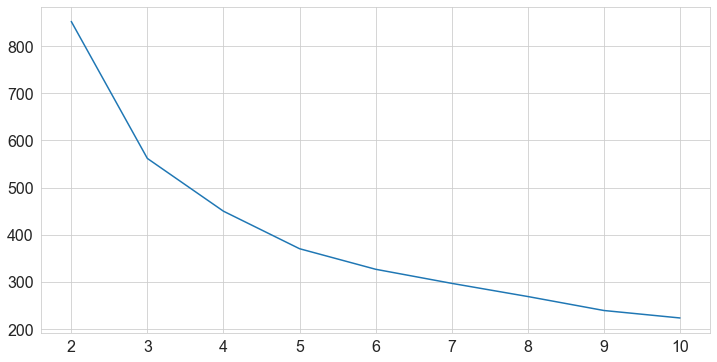

In [48]:
# Elbow Cuve

ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(scaled)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.figure(figsize=(12,6))
plt.plot(ssd[0], ssd[1])
plt.show()

In [49]:
#elbow curve can be seen at k=3

kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [50]:
kmean.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [51]:
# Adding the cluster ids for k = 3 with the original Dataframe

cntry['cluster_id_k3'] = kmean.labels_

In [52]:
cntry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000,2
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000,2
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000,2


In [53]:
cntry.cluster_id_k3.value_counts()

#as per below result

#there are 48 data points / countries in cluster 0
#92 datapoints in cluster 2
#and 27 datapoints in cluster 1


2    92
0    48
1    27
Name: cluster_id_k3, dtype: int64


## Plotting (k=3)

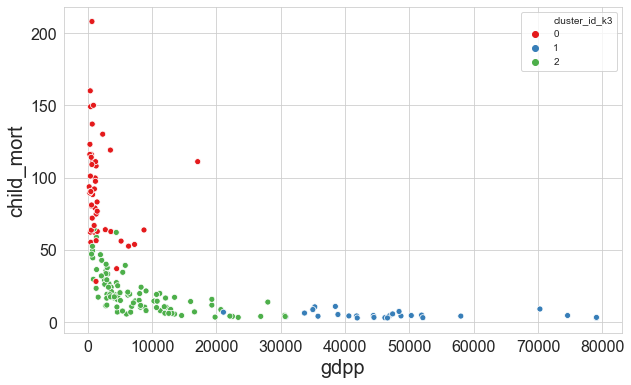

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id_k3', data = cntry, palette ='Set1')
plt.show()

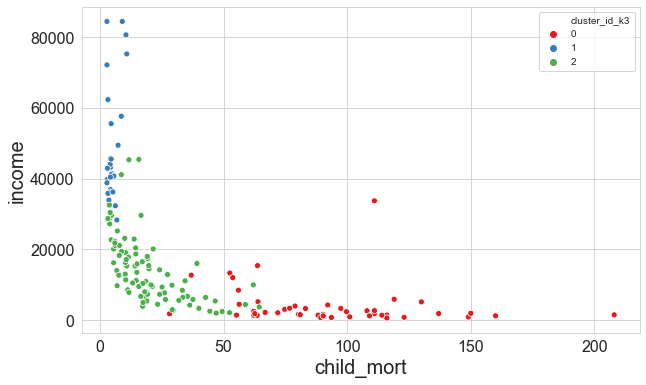

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id_k3', data = cntry, palette ='Set1')
plt.show()

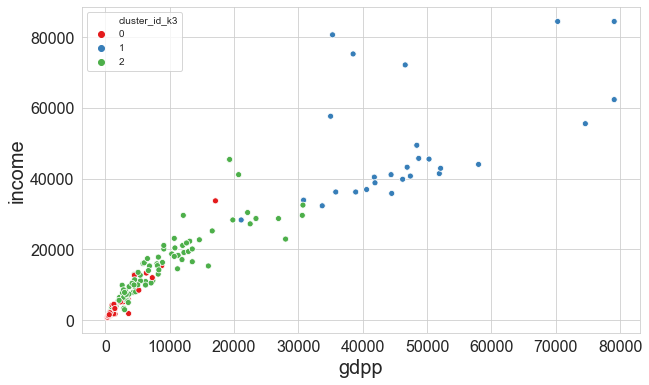

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id_k3', data = cntry, palette ='Set1')
plt.show()

### Cluster profiling - k =3

In [57]:
cntry.groupby('cluster_id_k3')['child_mort','income','gdpp'].mean()

,child_mort,income,gdpp
cluster_id_k3,,,
0,91.6104,3897.3542,1909.2083
1,5.1000,49057.3333,47476.8889
2,20.1772,14169.4565,8226.8696


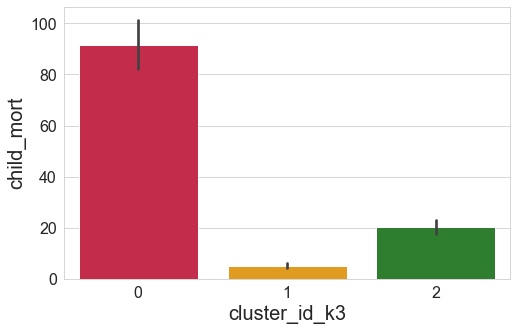

In [58]:
#finding the cluster that has low gdpp, low income and high child_mort

plt.figure(figsize=(8,5))
sns.barplot(x='cluster_id_k3', y='child_mort', data=cntry, palette=['crimson','orange','forestgreen'])
plt.show()

#from the below graph, cluster 0 has high child_mort


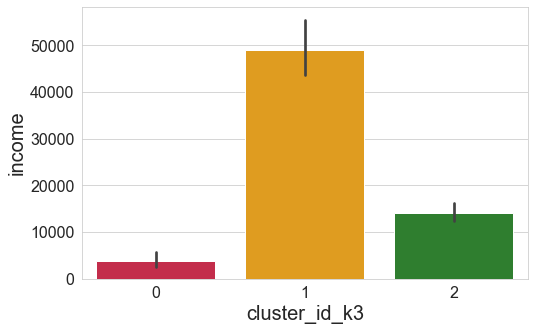

In [59]:

plt.figure(figsize=(8,5))
sns.barplot(x='cluster_id_k3', y='income', data=cntry, palette=['crimson','orange','forestgreen'])
plt.show()

#from the below graph, cluster 0 has lowest income

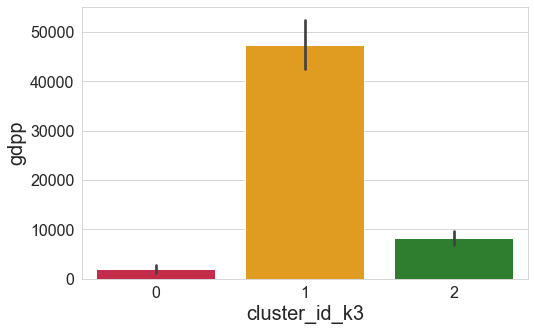

In [60]:

plt.figure(figsize=(8,5))
sns.barplot(x='cluster_id_k3', y='gdpp', data=cntry, palette=['crimson','orange','forestgreen'])
plt.show()

#from the below graph, cluster 0 has lowest gdpp

In [61]:
#finding the countries in cluster 0

c0 = cntry[cntry['cluster_id_k3'] ==0]

In [62]:
c0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0
17,Benin,111.0000,180.4040,31.0780,281.9760,1820.0000,0.8850,61.8000,5.3600,758.0000,0
21,Botswana,52.5000,2768.6000,527.0500,3257.5500,13300.0000,8.9200,57.1000,2.8800,6350.0000,0
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430.0000,6.8100,57.9000,5.8700,575.0000,0


In [63]:
#top ten countried in need of aid / sorted based on lowest gdpp

c0.sort_values(by = ['gdpp', 'income', 'child_mort'], ascending = [True, False, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3
26,Burundi,93.6000,20.6052,26.7960,90.5520,764.0000,12.3000,57.7000,6.2600,231.0000,0
88,Liberia,89.3000,62.4570,38.5860,302.8020,700.0000,5.4700,60.8000,5.0200,327.0000,0
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609.0000,20.8000,57.5000,6.5400,334.0000,0
112,Niger,123.0000,77.2560,17.9568,170.8680,814.0000,2.5500,58.8000,7.4900,348.0000,0
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399.0000,0
93,Madagascar,62.2000,103.2500,15.5701,177.5900,1390.0000,8.7900,60.8000,4.6000,413.0000,0
106,Mozambique,101.0000,131.9850,21.8299,193.5780,918.0000,7.6400,54.5000,5.5600,419.0000,0
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446.0000,0
94,Malawi,90.5000,104.6520,30.2481,160.1910,1030.0000,12.1000,53.1000,5.3100,459.0000,0
50,Eritrea,55.2000,23.0878,12.8212,112.3060,1420.0000,11.6000,61.7000,4.6100,482.0000,0


In [64]:
#top ten countried in need of aid / sorted based on highest child_mort

c0.sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3
66,Haiti,208.0000,101.2860,45.7442,428.3140,1500.0000,5.4500,32.1000,3.3300,662.0000,0
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399.0000,0
32,Chad,150.0000,330.0960,40.6341,390.1950,1930.0000,6.3900,56.5000,6.5900,897.0000,0
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446.0000,0
97,Mali,137.0000,161.4240,35.2584,248.5080,1870.0000,4.3700,59.5000,6.5500,708.0000,0
113,Nigeria,130.0000,589.4900,118.1310,405.4200,5150.0000,104.0000,60.5000,5.8400,2330.0000,0
112,Niger,123.0000,77.2560,17.9568,170.8680,814.0000,2.5500,58.8000,7.4900,348.0000,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609.0000,20.8000,57.5000,6.5400,334.0000,0
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430.0000,6.8100,57.9000,5.8700,575.0000,0


# now let us do a silhouette score analysis

### **`Silhouette Analysis`**

For n_clusters=2, the silhouette score is 0.47855777352323214
For n_clusters=3, the silhouette score is 0.422648203001893
For n_clusters=4, the silhouette score is 0.40850747073546606
For n_clusters=5, the silhouette score is 0.41486998248531126
For n_clusters=6, the silhouette score is 0.31609176207109585
For n_clusters=7, the silhouette score is 0.3115194734670782
For n_clusters=8, the silhouette score is 0.28134461814277173
For n_clusters=9, the silhouette score is 0.30796072651279277
For n_clusters=10, the silhouette score is 0.2956649666273336


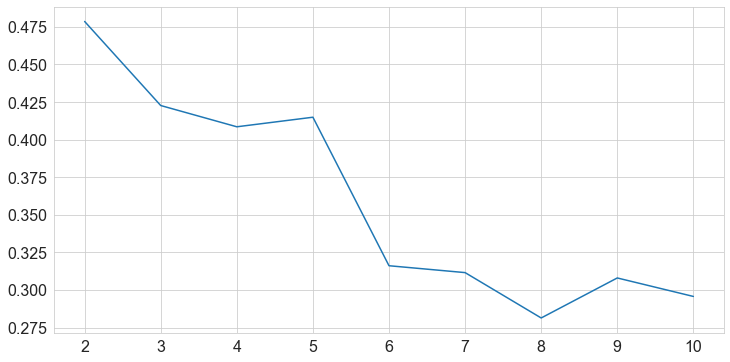

In [65]:
#silhouette analysis 

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(scaled)
    ss.append([k, silhouette_score(scaled, kmeans.labels_)])
    
    clust = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled, clust)
    print("For n_clusters={0}, the silhouette score is {1}".format(k, silhouette_avg))

#plot 
sil =pd.DataFrame(ss)
plt.figure(figsize=(12,6))
plt.plot(sil[0], sil[1])
plt.show()

In [66]:
#peak is at k = 2 and 5. 

#Silhouette score reaches its global maximum for the optimal value of k and it is seen here as k = 2

k2mean = KMeans(n_clusters = 2, random_state = 0)

k2mean.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [67]:
k2mean.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [68]:
# Adding the cluster ids for k = 2 with the original Dataframe

cntry['cluster_id_k2'] = k2mean.labels_

In [69]:
cntry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3,cluster_id_k2
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,0,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000,2,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000,2,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000,2,0


In [70]:
cntry.cluster_id_k2.value_counts()

0    130
1     37
Name: cluster_id_k2, dtype: int64


## Plotting (k=2)

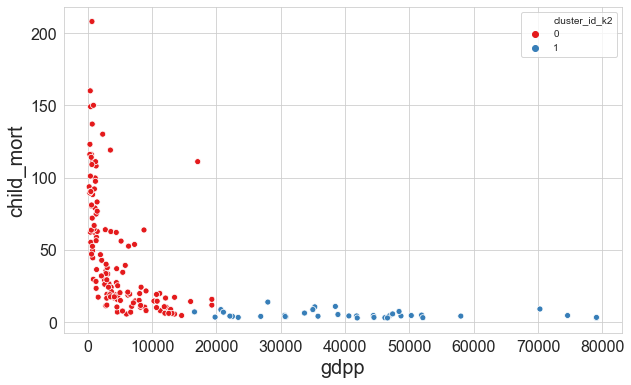

In [71]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id_k2', data = cntry, palette ='Set1')
plt.show()

#cluster 0 can be seen as having high child_mort and low gdpp

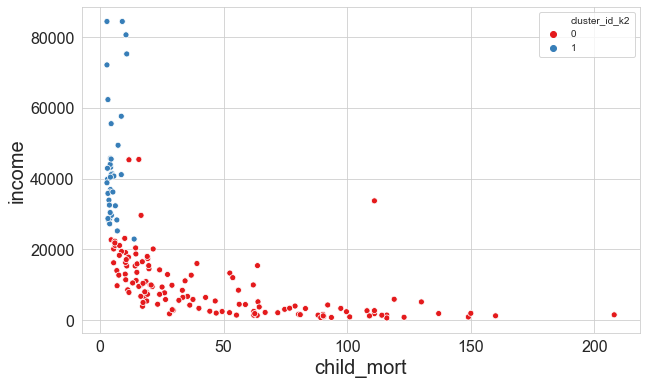

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_id_k2', data = cntry, palette ='Set1')
plt.show()

#cluster 0 can be seen having more number child_mort rate and less income

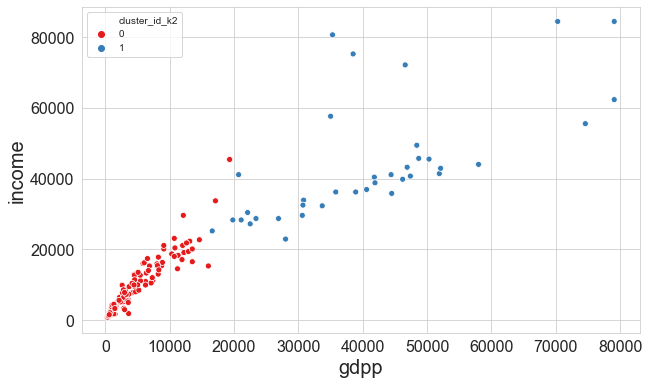

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id_k2', data = cntry, palette ='Set1')
plt.show()

#cluster 0 can be seen having low gdpp and income rate

### Cluster Profiling - k = 2

In [74]:
cntry.groupby('cluster_id_k2')['child_mort','income','gdpp'].mean()

,child_mort,income,gdpp
cluster_id_k2,,,
0,47.6715,9200.4846,4670.8769
1,5.2432,43760.7568,41166.9189


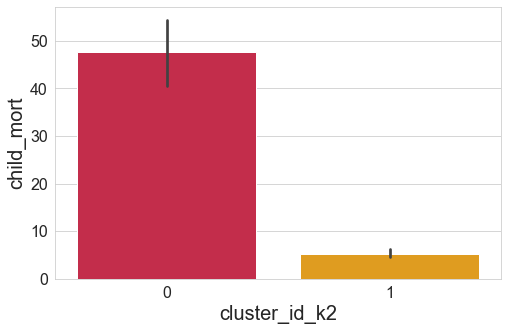

In [75]:
#finding the cluster that has low gdpp, low income and high child_mort

plt.figure(figsize=(8,5))
sns.barplot(x='cluster_id_k2', y='child_mort', data=cntry, palette=['crimson','orange','forestgreen'])
plt.show()

#from the below graph, cluster 0 has high child_mort


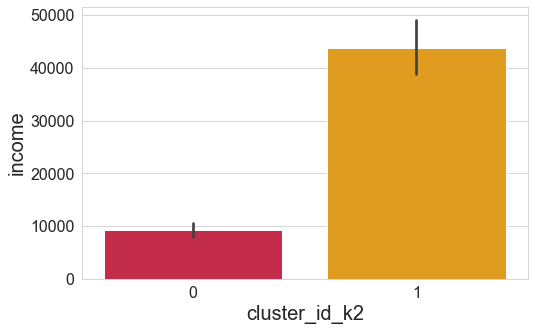

In [76]:

plt.figure(figsize=(8,5))
sns.barplot(x='cluster_id_k2', y='income', data=cntry, palette=['crimson','orange','forestgreen'])
plt.show()

#from the below graph, cluster 0 has lowest income

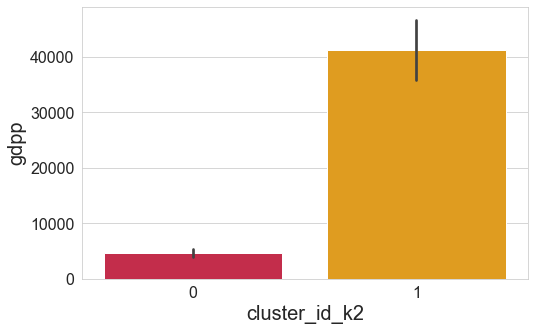

In [77]:

plt.figure(figsize=(8,5))
sns.barplot(x='cluster_id_k2', y='gdpp', data=cntry, palette=['crimson','orange','forestgreen'])
plt.show()

#from the below graph, cluster 0 has lowest gdpp

In [78]:
#finding the countries in cluster 0

cl0 = cntry[cntry['cluster_id_k2'] ==0]

In [79]:
cl0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3,cluster_id_k2
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,0,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000,2,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000,2,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000,2,0


In [80]:
#top ten countried in need of aid / sorted based on lowest gdpp

cl0.sort_values(by = ['gdpp', 'income', 'child_mort'], ascending = [True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3,cluster_id_k2
26,Burundi,93.6000,20.6052,26.7960,90.5520,764.0000,12.3000,57.7000,6.2600,231.0000,0,0
88,Liberia,89.3000,62.4570,38.5860,302.8020,700.0000,5.4700,60.8000,5.0200,327.0000,0,0
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609.0000,20.8000,57.5000,6.5400,334.0000,0,0
112,Niger,123.0000,77.2560,17.9568,170.8680,814.0000,2.5500,58.8000,7.4900,348.0000,0,0
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399.0000,0,0
93,Madagascar,62.2000,103.2500,15.5701,177.5900,1390.0000,8.7900,60.8000,4.6000,413.0000,0,0
106,Mozambique,101.0000,131.9850,21.8299,193.5780,918.0000,7.6400,54.5000,5.5600,419.0000,0,0
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446.0000,0,0
94,Malawi,90.5000,104.6520,30.2481,160.1910,1030.0000,12.1000,53.1000,5.3100,459.0000,0,0
50,Eritrea,55.2000,23.0878,12.8212,112.3060,1420.0000,11.6000,61.7000,4.6100,482.0000,0,0


In [81]:
#top ten countried in need of aid / sorted based on highest child_mort

cl0.sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3,cluster_id_k2
66,Haiti,208.0000,101.2860,45.7442,428.3140,1500.0000,5.4500,32.1000,3.3300,662.0000,0,0
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399.0000,0,0
32,Chad,150.0000,330.0960,40.6341,390.1950,1930.0000,6.3900,56.5000,6.5900,897.0000,0,0
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446.0000,0,0
97,Mali,137.0000,161.4240,35.2584,248.5080,1870.0000,4.3700,59.5000,6.5500,708.0000,0,0
113,Nigeria,130.0000,589.4900,118.1310,405.4200,5150.0000,104.0000,60.5000,5.8400,2330.0000,0,0
112,Niger,123.0000,77.2560,17.9568,170.8680,814.0000,2.5500,58.8000,7.4900,348.0000,0,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0,0
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609.0000,20.8000,57.5000,6.5400,334.0000,0,0
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430.0000,6.8100,57.9000,5.8700,575.0000,0,0


### `BOTH VALUES OF K GAVE SAME LIST OF COUNTRIES`

## Hierarchical Clustering

In [82]:
#importing librarires for hierarchical clustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [83]:
#original dataframe

cntry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3,cluster_id_k2
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,0,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000,2,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000,2,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000,2,0


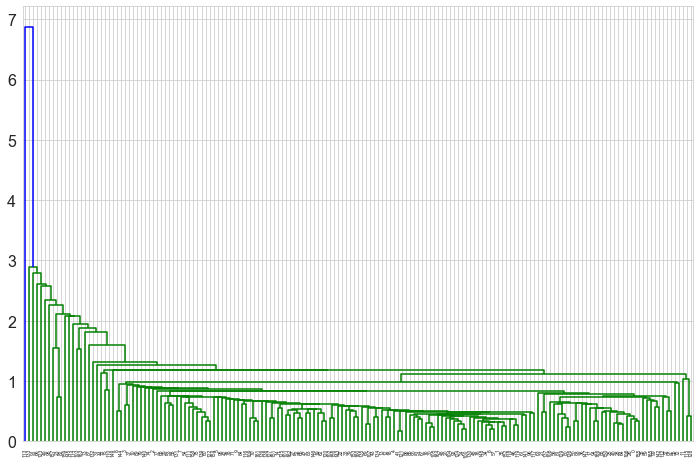

In [84]:
#using single linkage

plt.figure(figsize=(12,8))
merg = linkage(scaled, method='single', metric='euclidean')
dendrogram(merg)
plt.show()

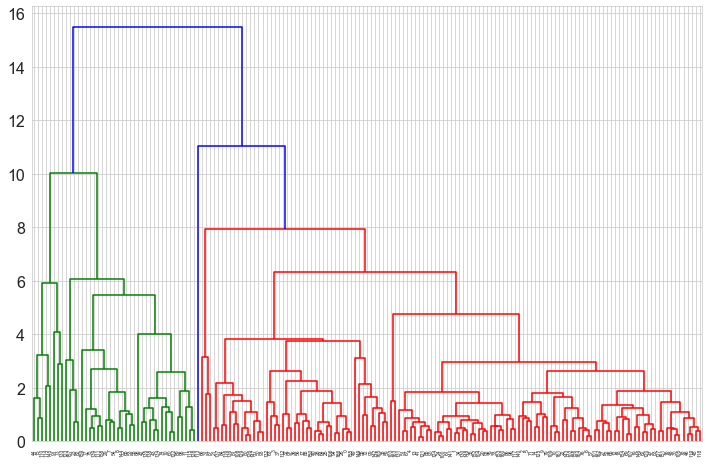

In [85]:
#using complete linkage for more readability

plt.figure(figsize=(12,8))
merg = linkage(scaled, method='complete', metric='euclidean')
dendrogram(merg)
plt.show()

### using complete linkage for further analysis

In [86]:
#cutting the tree at cluster = 3

cluster_labels = cut_tree(merg, n_clusters = 3).reshape(-1, )

cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [87]:
#assigning cluster labels to original dataframe

cntry['cluster_labels'] = cluster_labels

cntry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3,cluster_id_k2,cluster_labels
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,0,0,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000,2,0,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000,2,0,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0,0,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000,2,0,0


In [88]:
cntry.cluster_labels.value_counts()

0    125
1     41
2      1
Name: cluster_labels, dtype: int64

**`since there is only one data point in third cluster, cutting tree at cluster = 2`**

In [89]:
#cutting again at 2

cluster_labels = cut_tree(merg, n_clusters = 2).reshape(-1, )

cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [90]:
#assigning cluster labels to original dataframe

cntry['cluster_labels'] = cluster_labels

cntry.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3,cluster_id_k2,cluster_labels
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,0,0,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000,2,0,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000,2,0,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0,0,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000,2,0,0


In [91]:
#now as per hierarchical clustering, there is only two clusters

cntry.cluster_labels.value_counts()

0    126
1     41
Name: cluster_labels, dtype: int64

**Plots**

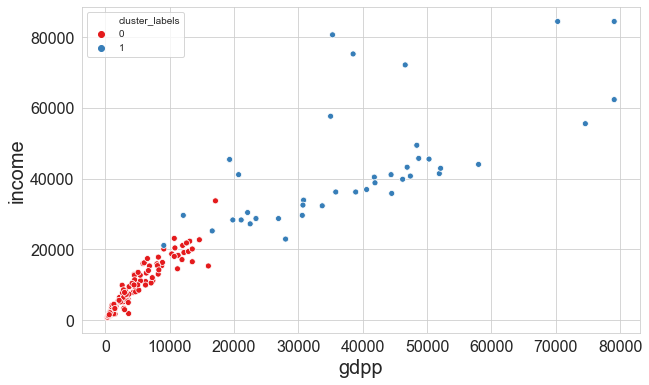

In [92]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_labels', data = cntry, palette ='Set1')
plt.show()

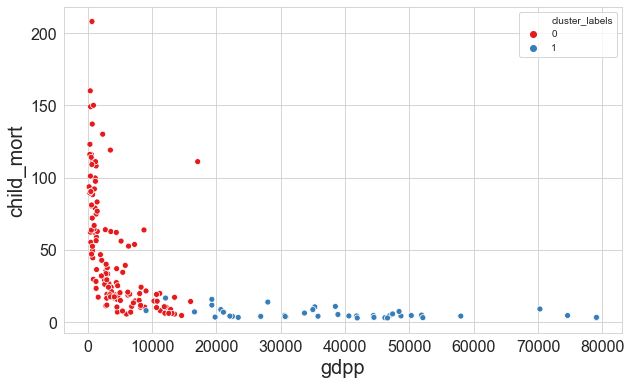

In [93]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_labels', data = cntry, palette ='Set1')
plt.show()

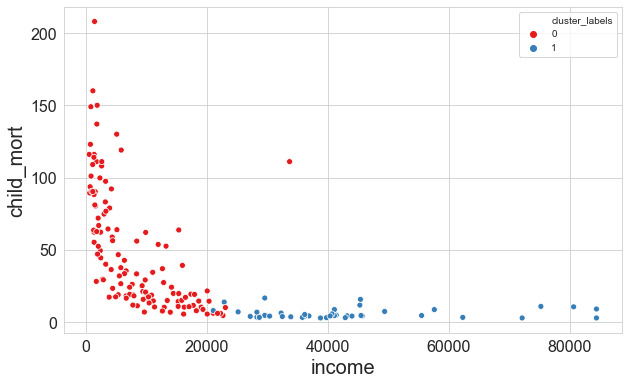

In [94]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_labels', data = cntry, palette ='Set1')
plt.show()

### Profiling

In [95]:
cntry.groupby('cluster_labels')['child_mort','income','gdpp'].mean()

,child_mort,income,gdpp
cluster_labels,,,
0,48.7730,8370.3413,4344.7937
1,5.9976,42940.1951,38608.4390


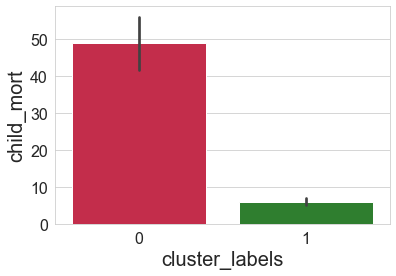

In [96]:
#plot cluster_labels vs child_mort

sns.barplot(x='cluster_labels', y='child_mort', data=cntry, palette=['crimson','forestgreen'])
plt.show()

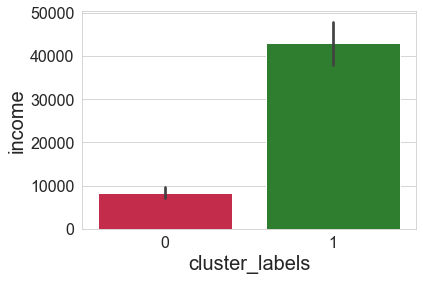

In [97]:
#plot cluster_labels vs income

sns.barplot(x='cluster_labels', y='income', data=cntry, palette=['crimson','forestgreen'])
plt.show()

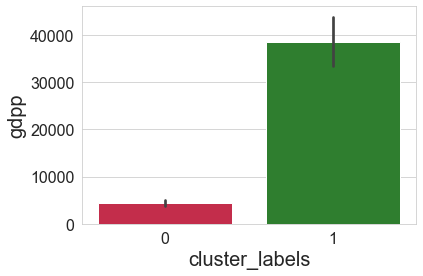

In [98]:
#plot cluster_labels vs gdpp

sns.barplot(x='cluster_labels', y='gdpp', data=cntry, palette=['crimson','forestgreen'])
plt.show()

In [99]:
#finding the countries in cluster_label == 0

hc0 = cntry[cntry['cluster_labels'] ==0]

In [100]:
#top ten countried in need of aid / sorted based on highest child_mort (BASED ON K = 3)

hc0.sort_values(by = ['child_mort', 'gdpp', 'income'], ascending = [False, True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3,cluster_id_k2,cluster_labels
66,Haiti,208.0000,101.2860,45.7442,428.3140,1500.0000,5.4500,32.1000,3.3300,662.0000,0,0,0
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399.0000,0,0,0
32,Chad,150.0000,330.0960,40.6341,390.1950,1930.0000,6.3900,56.5000,6.5900,897.0000,0,0,0
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446.0000,0,0,0
97,Mali,137.0000,161.4240,35.2584,248.5080,1870.0000,4.3700,59.5000,6.5500,708.0000,0,0,0
113,Nigeria,130.0000,589.4900,118.1310,405.4200,5150.0000,104.0000,60.5000,5.8400,2330.0000,0,0,0
112,Niger,123.0000,77.2560,17.9568,170.8680,814.0000,2.5500,58.8000,7.4900,348.0000,0,0,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0,0,0
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609.0000,20.8000,57.5000,6.5400,334.0000,0,0,0
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430.0000,6.8100,57.9000,5.8700,575.0000,0,0,0


In [101]:
hc0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3,cluster_id_k2,cluster_labels
0,Afghanistan,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553.0000,0,0,0
1,Albania,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090.0000,2,0,0
2,Algeria,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460.0000,2,0,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0,0,0
4,Antigua and Barbuda,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200.0000,2,0,0


In [102]:
#top ten countried in need of aid / sorted based on lowest gdpp

hc0.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3,cluster_id_k2,cluster_labels
26,Burundi,93.6000,20.6052,26.7960,90.5520,764.0000,12.3000,57.7000,6.2600,231.0000,0,0,0
88,Liberia,89.3000,62.4570,38.5860,302.8020,700.0000,5.4700,60.8000,5.0200,327.0000,0,0,0
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609.0000,20.8000,57.5000,6.5400,334.0000,0,0,0
112,Niger,123.0000,77.2560,17.9568,170.8680,814.0000,2.5500,58.8000,7.4900,348.0000,0,0,0
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399.0000,0,0,0
93,Madagascar,62.2000,103.2500,15.5701,177.5900,1390.0000,8.7900,60.8000,4.6000,413.0000,0,0,0
106,Mozambique,101.0000,131.9850,21.8299,193.5780,918.0000,7.6400,54.5000,5.5600,419.0000,0,0,0
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446.0000,0,0,0
94,Malawi,90.5000,104.6520,30.2481,160.1910,1030.0000,12.1000,53.1000,5.3100,459.0000,0,0,0
50,Eritrea,55.2000,23.0878,12.8212,112.3060,1420.0000,11.6000,61.7000,4.6100,482.0000,0,0,0


**`TOP 10 COUNTRIES THAT ARE IN MUCH NEED FOR AID BASED ON LOWEST GDPP RATE`**
1. Burundi
2. Liberia
3. Congo, Dem. Rep
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea

In [103]:
#top ten countried in need of aid / sorted based on highest child_mort

hc0.sort_values(by = ['child_mort', 'gdpp', 'income'], ascending = [False, True, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_k3,cluster_id_k2,cluster_labels
66,Haiti,208.0000,101.2860,45.7442,428.3140,1500.0000,5.4500,32.1000,3.3300,662.0000,0,0,0
132,Sierra Leone,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399.0000,0,0,0
32,Chad,150.0000,330.0960,40.6341,390.1950,1930.0000,6.3900,56.5000,6.5900,897.0000,0,0,0
31,Central African Republic,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446.0000,0,0,0
97,Mali,137.0000,161.4240,35.2584,248.5080,1870.0000,4.3700,59.5000,6.5500,708.0000,0,0,0
113,Nigeria,130.0000,589.4900,118.1310,405.4200,5150.0000,104.0000,60.5000,5.8400,2330.0000,0,0,0
112,Niger,123.0000,77.2560,17.9568,170.8680,814.0000,2.5500,58.8000,7.4900,348.0000,0,0,0
3,Angola,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,6.1600,3530.0000,0,0,0
37,"Congo, Dem. Rep.",116.0000,137.2740,26.4194,165.6640,609.0000,20.8000,57.5000,6.5400,334.0000,0,0,0
25,Burkina Faso,116.0000,110.4000,38.7550,170.2000,1430.0000,6.8100,57.9000,5.8700,575.0000,0,0,0


**`TOP 10 COUNTRIES THAT ARE IN MUCH NEED FOR AID BASED ON HIGHEST CHILD_MORT RATE`**
1. Haiti
2. Sierra Leone
3. Chad
4. Central African Republic
5. Mali
6. Nigeria
7. Niger
8. Angola
9. Congo, Dem. Rep
10. Burkina Faso

## Conclusion on Countries that need aid

### List of all 48 countries


Afghanistan,
Angola,
Benin,
 Botswana,
Burkina Faso,
Burundi,
Cameroon,
Central African Republic,
Chad,
Comoros,
Congo, Dem. Rep.,
Congo, Rep.,
Cote d'Ivoire,
Equatorial Guinea,
Eritrea,
Gabon,
Gambia,
Ghana,
Guinea,
Guinea-Bissau,
Haiti,
Iraq,
Kenya,
Kiribati,
Lao,
Lesotho,
Liberia,
Madagascar,
Malawi,
Mali,
Mauritania,
Mozambique,
Namibia,
Niger,
Nigeria,
Pakistan,
Rwanda,
Senegal,
Sierra Leone,
Solomon Islands,
South Africa,
Sudan,
Tanzania,
Timor-Leste,
Togo,
Uganda,
Yemen,
Zambia
